<h2>1.导入数据

In [583]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

In [584]:
os.chdir("/home/songyang/project/kesci/bike/")
data = pd.read_csv('train.csv')

<h2>2.描述性统计分析

In [585]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [586]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [587]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**数据由10886行，12列数据构成，各名称意义如下：**

datetime 时间

season 季节(1234分别为春夏秋冬)

holiday 节假日(0否 1是)

workingday 工作日(0否 1是)

weather 天气(1晴天 2阴天 3小雨小雪 4恶劣天气)

temp 实际温度

atemp 体感温度

humidity 湿度

windspeed 风速

casual 未注册用户

registered 注册用户

count 租借数量


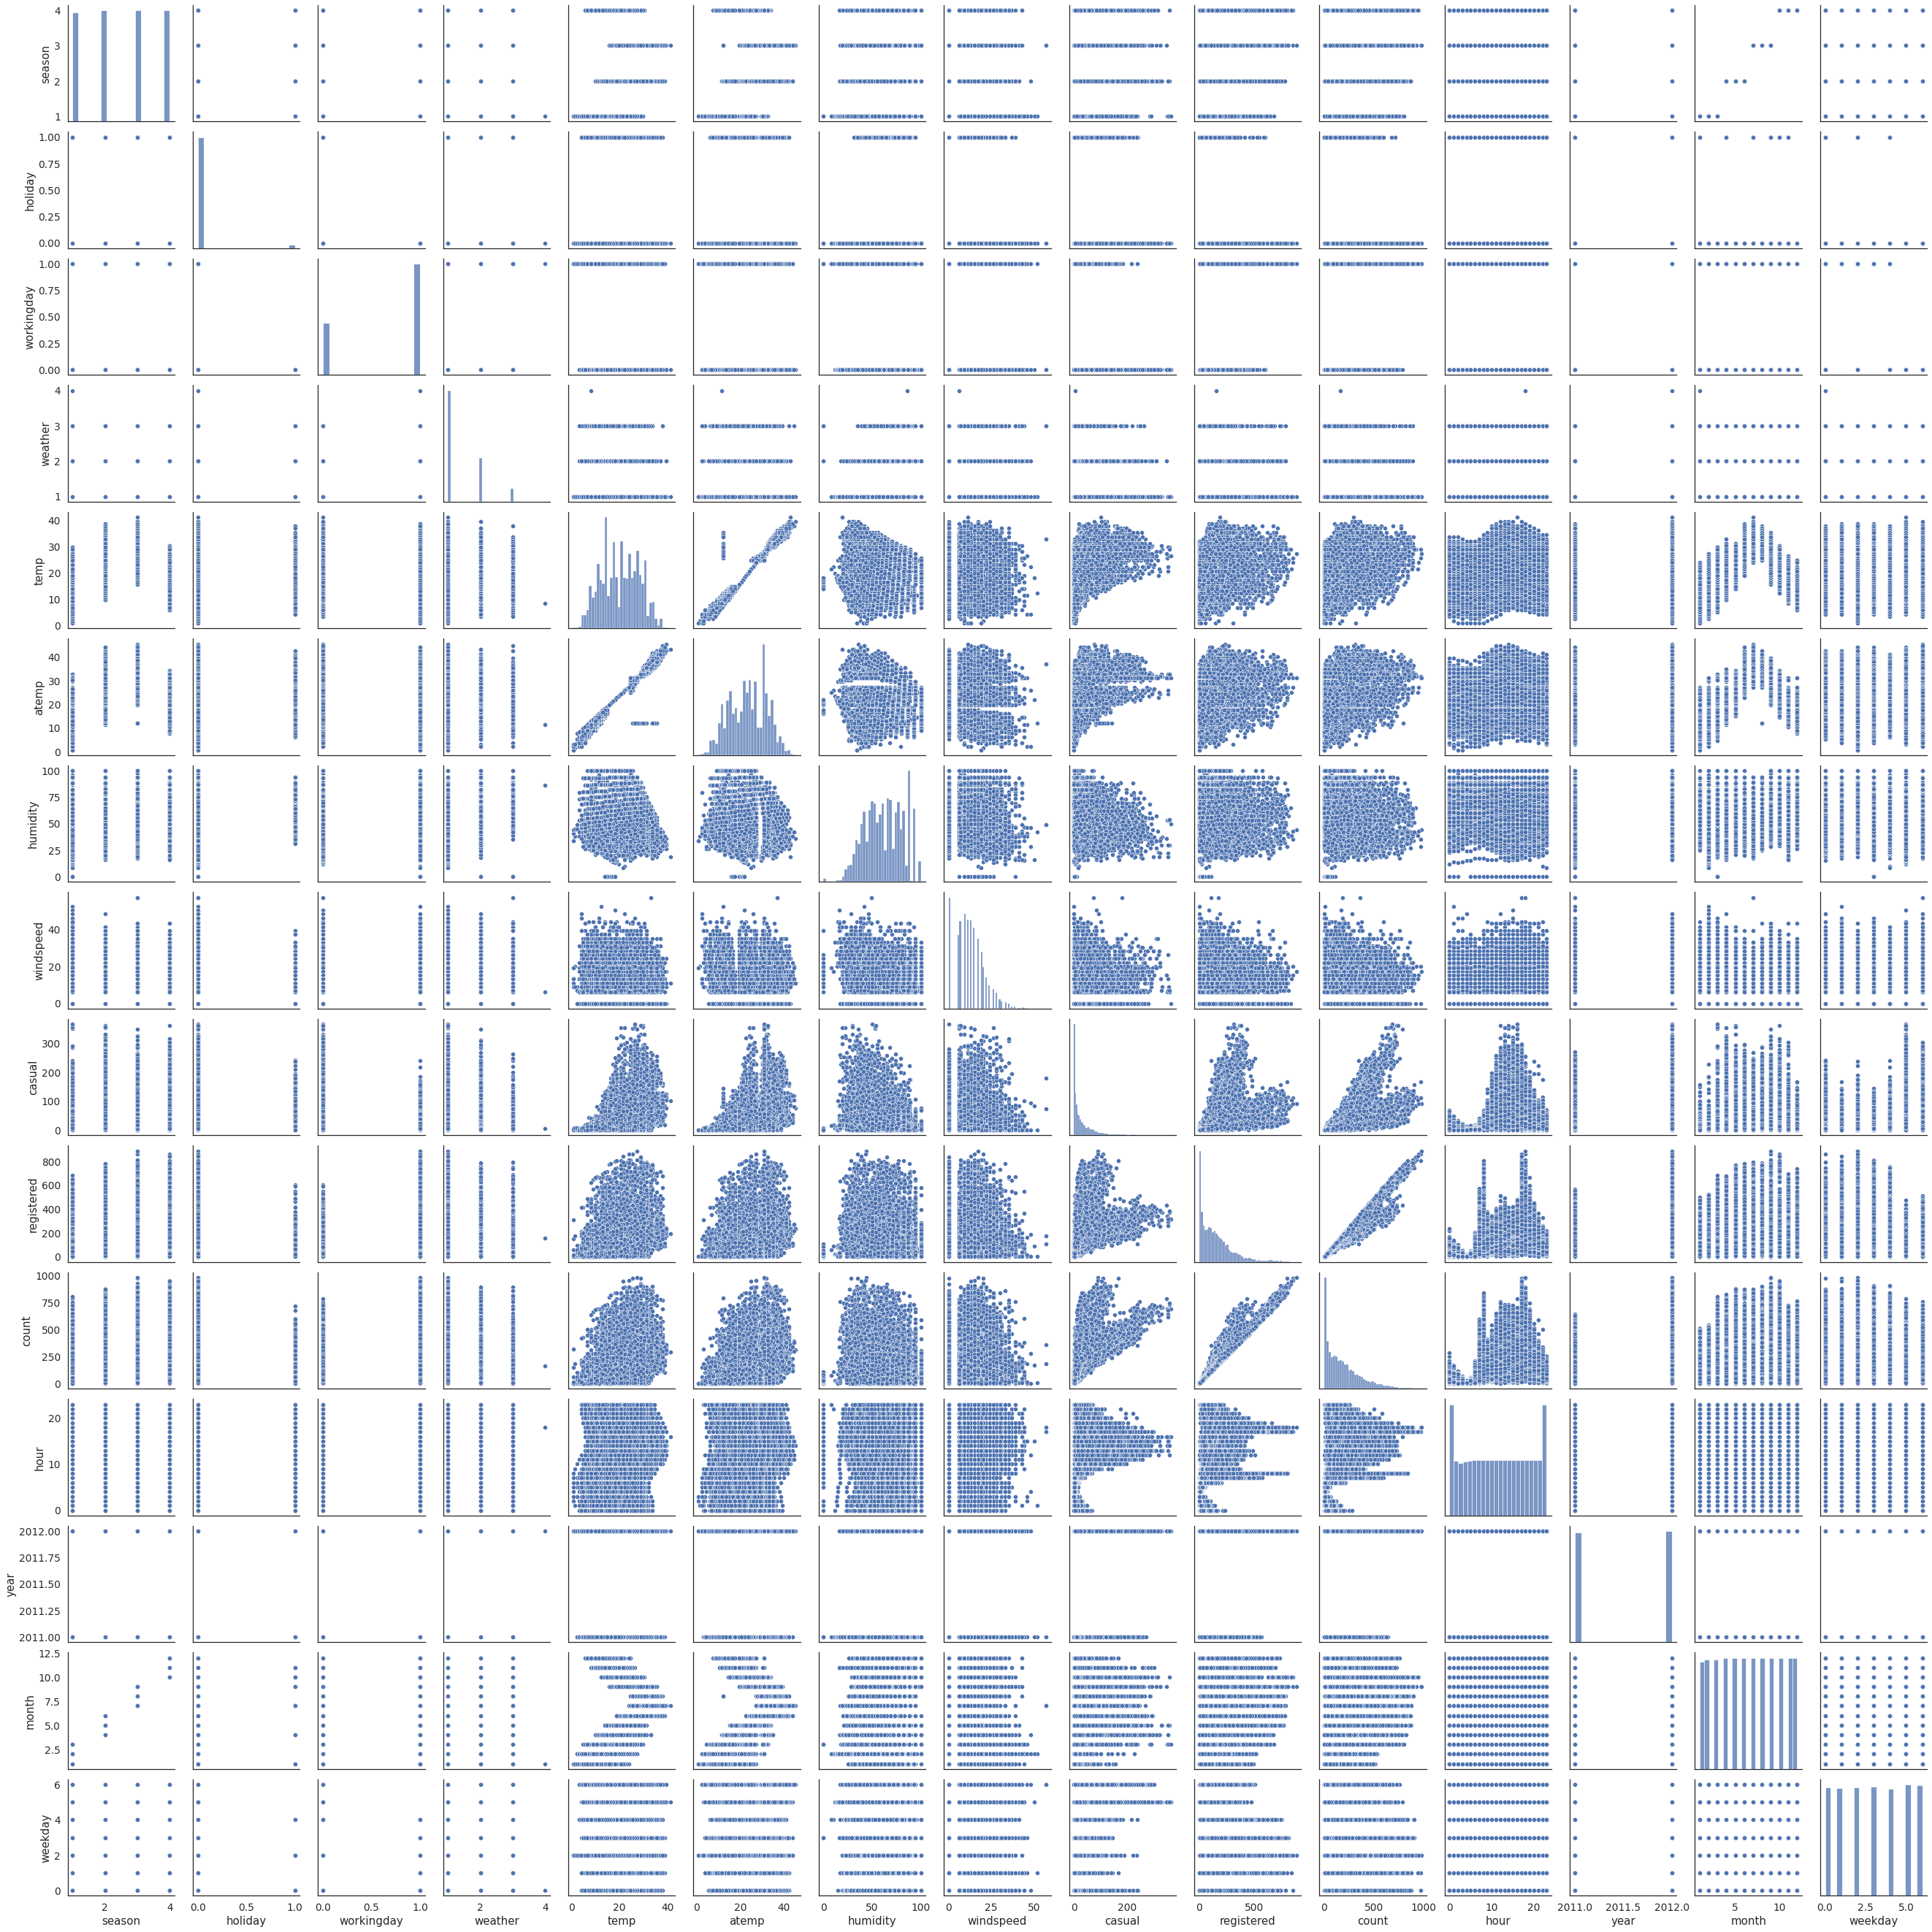

In [613]:
import seaborn as sns
sns.pairplot(data)

**由图可知**

1.每季度租车数量基本平均，在第三季度租车数量最高。

2.非节假日租车数量比节假日多。

3.工作日租车数量比非工作日多。

4.天气好时租车数量多。

5.实际温度和体表温度适中时（20-30度）租车数量较多。

6.湿度基本对租车数量影响不大。

7.风速不超过30时，对租车数量影响不大。

8.当日注册用户租车量和租车总量之间近似符合y=x函数，说明注册用户当日租车量对当日租车总量影响较大。


<AxesSubplot:>

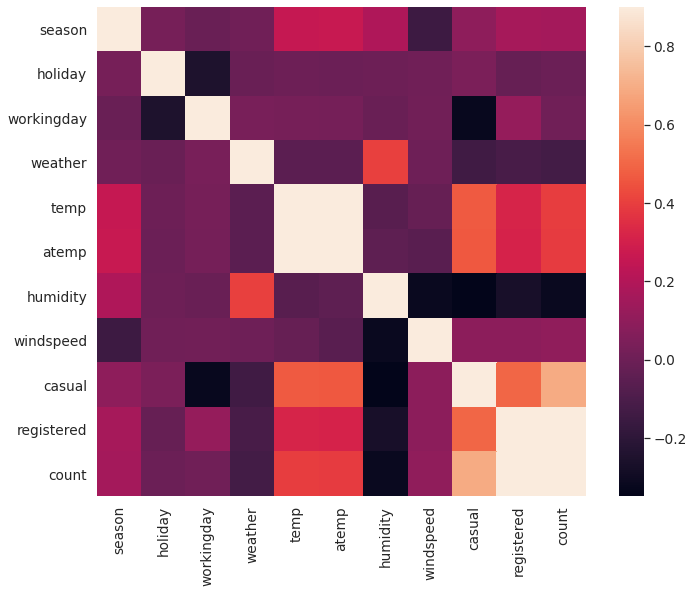

In [593]:
corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

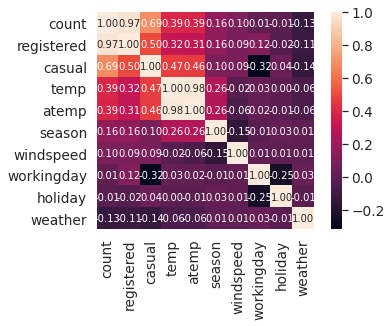

In [594]:
# 与Y的相关性矩阵top10热图
import numpy as np
k=10
corrmat = data.corr()
cols = corrmat.nlargest(k, 'count')['count'].index # Y column name
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

**由图可知**

1.排除注册用户和非注册用户租车量和租车总量的相关性后，发现实际温度和体表温度对租车量有较好的相关性，季节也有微弱相关。

<h2>3.可视化

In [595]:
data['datetime']=pd.to_datetime(data['datetime'])

In [596]:
data['hour']=data['datetime'].dt.hour

In [597]:
data['year']=data['datetime'].dt.year

In [598]:
data['month']=data['datetime'].dt.month

In [599]:
data['weekday']=data['datetime'].dt.dayofweek

In [600]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011,1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011,1,5


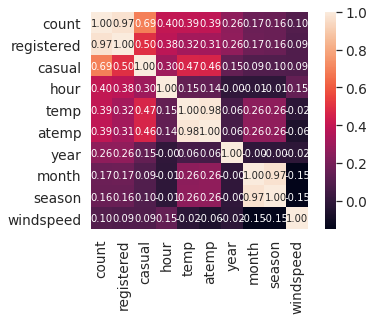

In [601]:
# 与Y的相关性矩阵top10热图
import numpy as np
k=10
corrmat = data.corr()
cols = corrmat.nlargest(k, 'count')['count'].index # Y column name
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

<h3>租车--时间

In [602]:
import seaborn as sns

<AxesSubplot:xlabel='hour', ylabel='count'>

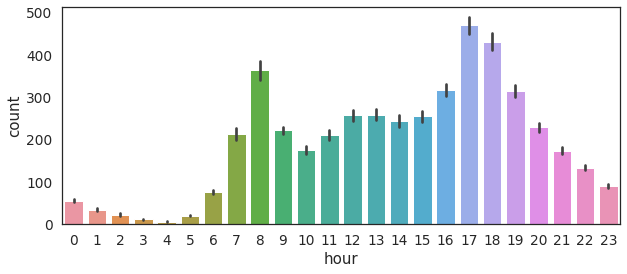

In [610]:
sns.set_style("white") # 设置背景https://www.kesci.com/mw/project/5e3b866ab8c462002d66f5f1
plt.subplots(figsize=(10,4))
sns.barplot(x=data['hour'],y=data['count'])

<AxesSubplot:xlabel='month', ylabel='count'>

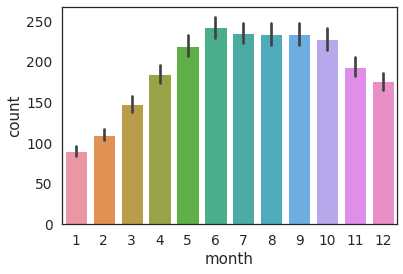

In [608]:
sns.barplot(x=data['month'],y=data['count'])

<AxesSubplot:xlabel='year', ylabel='count'>

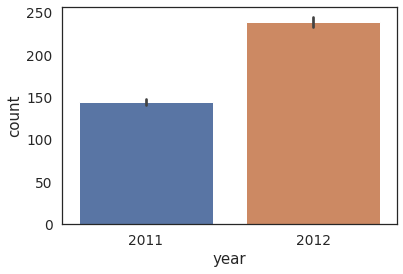

In [611]:
sns.barplot(x=data['year'],y=data['count'])

<AxesSubplot:xlabel='weekday', ylabel='count'>

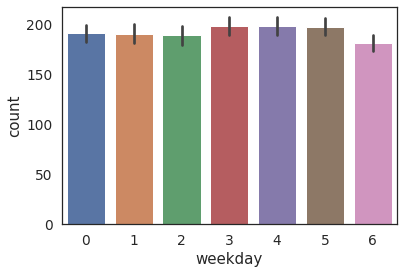

In [612]:
sns.barplot(x=data['weekday'],y=data['count'])

**可知早晚高峰期间租车量较大**

<h3>租车--季度

<AxesSubplot:xlabel='season', ylabel='count'>

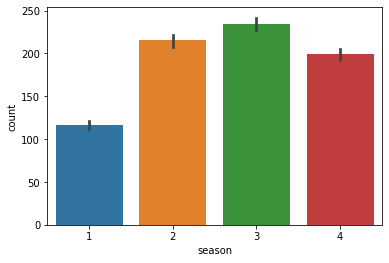

In [53]:
sns.barplot(x=data['season'],y=data['count'])

<font color="red">sns调色板https://blog.csdn.net/Droke_Zhou/article/details/87479132<font>

<font color="red">sns绘图操作汇总https://blog.csdn.net/suzyu12345/article/details/69029106<font>

<AxesSubplot:xlabel='hour', ylabel='count'>

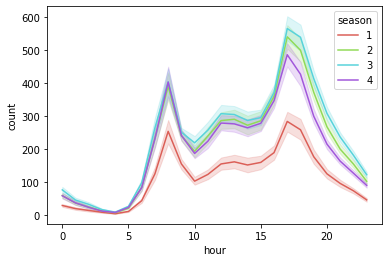

In [55]:
sns.lineplot(x=data['hour'], y=data['count'],hue=data["season"],palette=sns.color_palette("hls",4))

**可见在第三季度租车量最多**

<h3>租车--节日、工作日

<AxesSubplot:xlabel='hour', ylabel='count'>

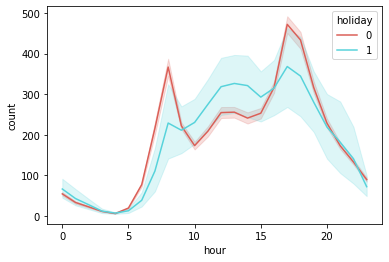

In [57]:
sns.lineplot(x=data['hour'], y=data['count'],hue=data["holiday"],palette=sns.color_palette("hls",2))

**可见节假日早晚高峰期的租车数量低于非节假日，且节假日早上时间租车量不多，晚上时间租车量最多**

<AxesSubplot:xlabel='hour', ylabel='count'>

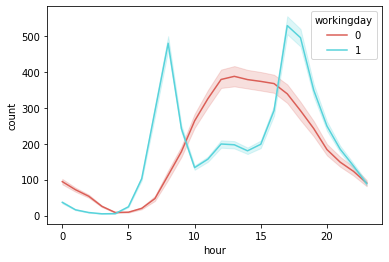

In [59]:
sns.lineplot(x=data['hour'], y=data['count'],hue=data["workingday"],palette=sns.color_palette("hls",2))

In [67]:
data['datetime'].dt.dayofweek.value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: datetime, dtype: int64

<AxesSubplot:xlabel='datetime', ylabel='count'>

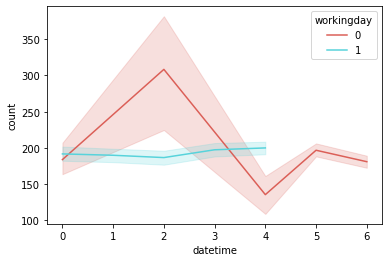

In [69]:
#df['datetime'].dt.dayofweek 输出这一天是周中的第几天，Monday=0, Sunday=6
sns.lineplot(x=data['datetime'].dt.dayofweek, y=data['count'],hue=data["workingday"],palette=sns.color_palette("hls",2))

**可见工作日周一到周五用车量相对平均**

<AxesSubplot:xlabel='datetime', ylabel='count'>

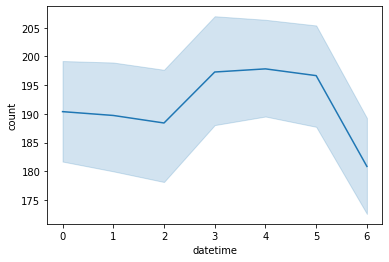

In [70]:
#不区分是否为工作日
sns.lineplot(x=data['datetime'].dt.dayofweek, y=data['count'])

**不区分是否为工作日时，可见周五租车量最多**

<AxesSubplot:xlabel='temp', ylabel='count'>

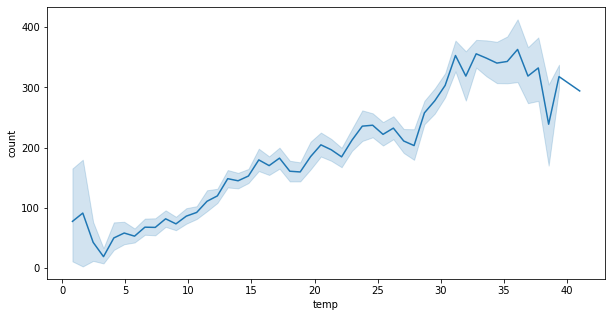

In [133]:
f,ax= plt.subplots(figsize = (10, 5))
#plt.xlim((0,30)) #x轴刻度范围
#plt.ylim((0,1))  #y轴刻度范围
sns.lineplot(x=data['temp'],y=data['count'])

**<font color="red" size=3>设置刻度<font>**

<AxesSubplot:xlabel='atemp', ylabel='count'>

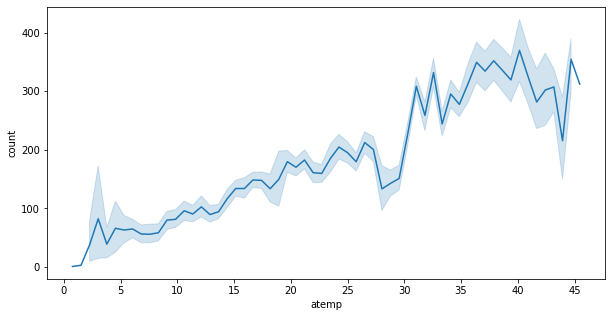

In [136]:
from matplotlib.pyplot import MultipleLocator
f,ax= plt.subplots(figsize = (10, 5))
x_major_locator=MultipleLocator(5)
ax.xaxis.set_major_locator(x_major_locator)
sns.lineplot(x=data['atemp'],y=data['count'])
#ax=ax.set_xticklabels(ax.get_xticklabels(), rotation=-90)

**<font color="red" size=3>多子图绘制<font>**

<AxesSubplot:xlabel='atemp', ylabel='count'>

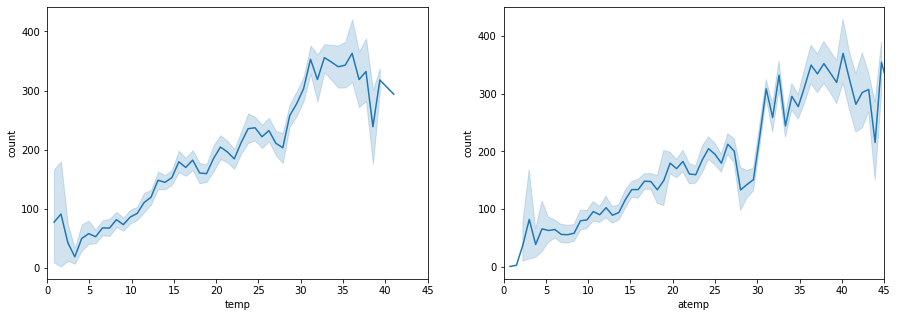

In [147]:
plt.figure(figsize=(15, 5))
ax = plt.subplot(1,2,1)
x_major_locator=MultipleLocator(5)
plt.xlim((0,45)) # 设置x轴范围
ax.xaxis.set_major_locator(x_major_locator)
sns.lineplot(x=data['temp'],y=data['count'])

ax = plt.subplot(1,2,2)
x_major_locator=MultipleLocator(5)
plt.xlim((0,45)) # 设置x轴范围
ax.xaxis.set_major_locator(x_major_locator)
sns.lineplot(x=data['atemp'],y=data['count'])

**可见当环境温度32-35度，体感温度35-40度时，租车量较多**

In [144]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<h3>租车--湿度风速

<AxesSubplot:xlabel='windspeed', ylabel='count'>

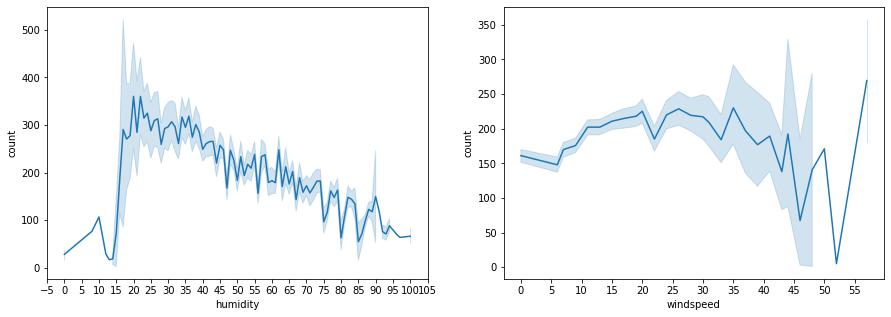

In [146]:
plt.figure(figsize=(15, 5))
ax = plt.subplot(1,2,1)
x_major_locator=MultipleLocator(5)

ax.xaxis.set_major_locator(x_major_locator)
sns.lineplot(x=data['humidity'],y=data['count'])

ax = plt.subplot(1,2,2)
x_major_locator=MultipleLocator(5)

ax.xaxis.set_major_locator(x_major_locator)
sns.lineplot(x=data['windspeed'],y=data['count'])

**可见湿度在18-20时，租车量较多**

<h3>租车--注册和非注册用户的占比

<h3>一个案例

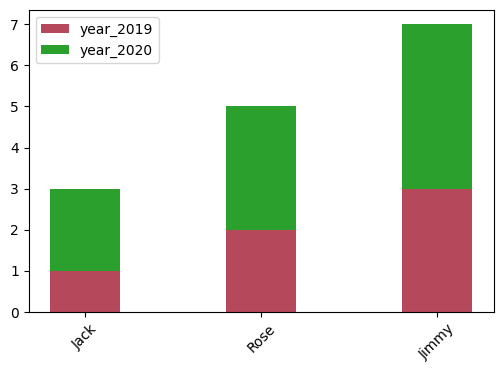

In [154]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(dpi=100)
labels = ['Jack','Rose','Jimmy']
year_2019=np.arange(1,4)
year_2020=np.arange(1,4)+1
bar_width=0.4

plt.bar(np.arange(len(labels)),
        year_2019,
        color='#B5495B',
        width=bar_width, 
        label='year_2019'
        )
plt.bar(np.arange(len(labels)),
        year_2020,
        color='#2ca02c',
        width=bar_width,
        bottom=year_2019,#上面柱子起始高度设置为第一个柱子的结束位置，默认从0开始
        label='year_2020'#图例
        )
plt.xticks(np.arange(0, 3, step=1),labels,rotation=45)#定义柱子名称
plt.legend(loc=2)#图例在左边


<h3>开始操作

In [172]:
# 统计每个小时，注册用户和非注册用户租车量的总数
casual_sum = data.groupby(['hour']).apply(lambda x: pd.DataFrame({'hour':x['hour'], 'n':sum(x['casual'])},index=x.index)).drop_duplicates()
register_sum = data.groupby(['hour']).apply(lambda x: pd.DataFrame({'hour':x['hour'], 'n':sum(x['registered'])},index=x.index)).drop_duplicates()

In [173]:
casual_sum.head()

,hour,n
0,0,4692
1,1,2957
2,2,2159
3,3,1161
4,4,558


In [175]:
register_sum.head()

,hour,n
0,0,20396
1,1,12415
2,2,8100
3,3,3930
4,4,2274


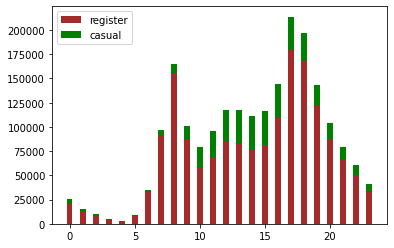

In [179]:
plt.bar(register_sum['hour'],
        register_sum['n'],
        color='brown',
        width=0.4, 
        label='register'
        )
plt.bar(casual_sum['hour'],
        casual_sum['n'],
        color='green',
        width=0.4, 
        bottom=register_sum['n'], # 从该刻度开始往上算，所以x轴刻度要完全一致
        label='casual'
        )

plt.legend(loc=2)#图例在左边

**可见注册用户占了租车用户的大部分**

<h2>4.回归分析及预测

In [514]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011,1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011,1,5


<h3>4.1 数据预处理

In [649]:
#剔除注册和非注册用户数，只保留最终租车量
datane = data.iloc[:,[1,2,3,4,5,6,7,8,12,11,13,14,15]]

In [650]:
datane

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,count,year,month,weekday
0,1,0,0,1,9.84,14.395,81,0.0000,0,16,2011,1,5
1,1,0,0,1,9.02,13.635,80,0.0000,1,40,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,2,32,2011,1,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,13,2011,1,5
4,1,0,0,1,9.84,14.395,75,0.0000,4,1,2011,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,19,336,2012,12,2
10882,4,0,1,1,14.76,17.425,57,15.0013,20,241,2012,12,2
10883,4,0,1,1,13.94,15.910,61,15.0013,21,168,2012,12,2
10884,4,0,1,1,13.94,17.425,61,6.0032,22,129,2012,12,2


In [651]:
datane.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
hour            int64
count           int64
year            int64
month           int64
weekday         int64
dtype: object

**显然season、holiday、workingday、hour实际应该为“字符型”，转换为onehot编码，而weather可以认为是定序型，其数字越小，租车量可能越大，所以这里不做转换**

In [652]:
col = ['season','holiday','workingday','year','month','weekday','weather']
for i in col:
    datane[i]=datane[i].astype(str)

In [653]:
#转换后的数据类型
datane.dtypes

season         object
holiday        object
workingday     object
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
hour            int64
count           int64
year           object
month          object
weekday        object
dtype: object

In [654]:
#改为onehot编码
datane1 = pd.get_dummies(datane)

In [655]:
datane1.head()

,temp,atemp,humidity,windspeed,hour,count,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4,year_2011,year_2012,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,9.84,14.395,81,0.0,0,16,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,9.02,13.635,80,0.0,1,40,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,9.02,13.635,80,0.0,2,32,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,9.84,14.395,75,0.0,3,13,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,9.84,14.395,75,0.0,4,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [659]:
#调整下顺序
cols=datane1.columns.tolist()

In [675]:
ncols = [cols[5]]+[cols[0]]+cols[2:5]+cols[6:]

In [676]:
df = datane1[ncols]

In [678]:
df.head()

,count,temp,humidity,windspeed,hour,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4,year_2011,year_2012,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,16,9.84,81,0.0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,40,9.02,80,0.0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,32,9.02,80,0.0,2,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,13,9.84,75,0.0,3,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,9.84,75,0.0,4,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


<h3>4.2 特征工程

**查看目标变量的偏态**

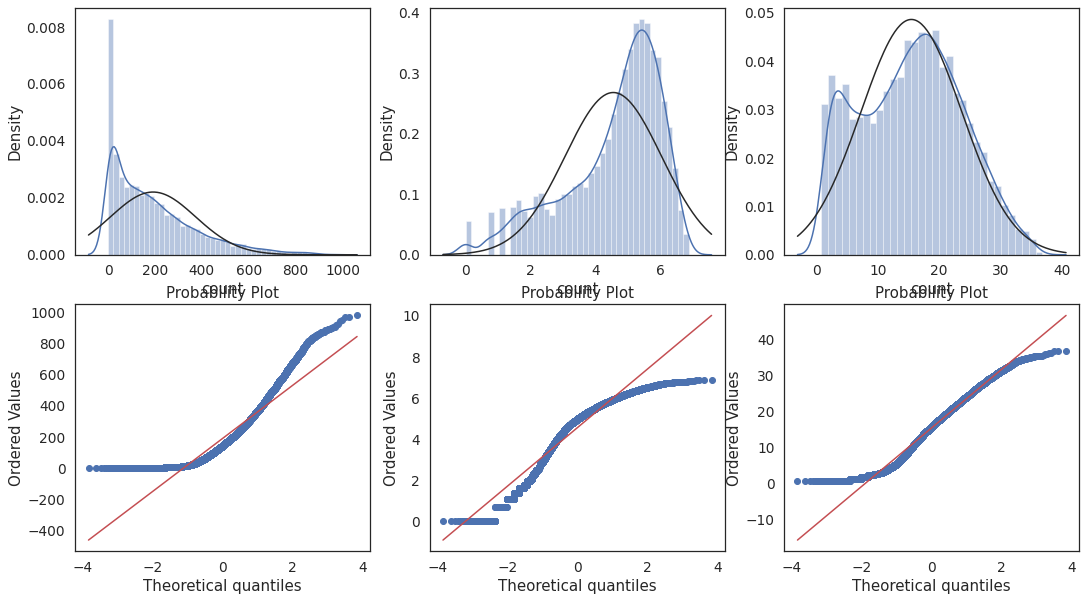

In [630]:
plt.figure(figsize=(18, 10)) 
from scipy import stats
import seaborn as sns
from scipy.stats import norm, skew 

plt.subplot(2,3,1)
sns.distplot(df['count'],fit=norm)

plt.subplot(2,3,2)
sns.distplot(np.log(df['count']),fit=norm)

plt.subplot(2,3,3)
from scipy.special import boxcox1p
sns.distplot(boxcox1p(df['count'], 0.4),fit=norm)

plt.subplot(2,3,4)
res1=stats.probplot(df['count'], plot=plt)

plt.subplot(2,3,5)
res2=stats.probplot(np.log(df['count']), plot=plt)

plt.subplot(2,3,6)
res3=stats.probplot(boxcox1p(df['count'], 0.4), plot=plt)

**由上可知，利用boxcox变换将count值正态化**

In [679]:
df['count']=boxcox1p(df['count'], 0.4)

**查看自变量的偏态**

参考

In [ ]:
## 筛选出所有数值型的变量
#numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
#
## 检查所有数值型变量的偏态
#skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
#print("\nSkew in numerical features: \n")
#skewness = pd.DataFrame({'Skew' :skewed_feats})
#
##筛选出偏态绝对值大于0.75的列进行box-cox
#skewness = skewness[abs(skewness) > 0.75]
#print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
#
#from scipy.special import boxcox1p
#skewed_features = skewness.index
#lam = 0.15 #lambda可选值λ = 1，2，0.5 ...关键是使数据最符合正态分布
#for feat in skewed_features:
#    all_data[feat] = boxcox1p(all_data[feat], lam)

In [530]:
# 筛选出所有数值型的变量
numeric_feats = df.dtypes[(df.dtypes =="int64") | (df.dtypes =="float64")].index

# 检查所有数值型变量的偏态
from scipy.special import boxcox1p, inv_boxcox1p
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness[abs(skewness) > 0.75]


Skew in numerical features: 



,Skew
weather,1.243313
windspeed,NaN
count,NaN
temp,NaN
humidity,NaN
atemp,NaN


**天气为非连续性变量，不可正态化**

**综上，自变量和目标变量正态化完成**

**expm1对应于log1p转换，inv_boxcox1pd对应于boxcox1p转换，例子如下：**

t1=np.log1p(2)

t2=np.expm1(t1)

t2

1.9999999999999996

t3=boxcox1p(2,0.4)

t4=inv_boxcox1p(t3,0.4)

t4

2.0000000000000004

In [635]:
df

,hour,weather,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,year_2011,year_2012,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,1,9.84,14.395,81,0.0000,5.264609,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,1,9.02,13.635,80,0.0000,8.542148,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,1,9.02,13.635,80,0.0000,7.623847,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3,1,9.84,14.395,75,0.0000,4.684412,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4,1,9.84,14.395,75,0.0000,0.798770,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,19,1,15.58,19.695,50,26.0027,23.144366,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10882,20,1,14.76,17.425,57,15.0013,19.962917,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10883,21,1,13.94,15.910,61,15.0013,16.957843,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10884,22,1,13.94,17.425,61,6.0032,15.019324,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [480]:
inv_boxcox1p(5.264609,0.4)

16.000001346525178

<h3>4.3 数据建模

In [680]:
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
import numpy as np

<h4>4.3.1 进行泛算法回归

In [681]:
names = ['Decision Tree', 'Linear Regression', 'SVR', 'KNN', 'RFR', 'Ada Boost', 
    'Gradient Boost', 'Bagging', 'Extra Tree']
regressors = [
    DecisionTreeRegressor(),
    LinearRegression(),
    SVR(gamma='scale'),
    KNeighborsRegressor(),
    RandomForestRegressor(n_estimators=20),
    AdaBoostRegressor(n_estimators=50),
    GradientBoostingRegressor(n_estimators=50),
    BaggingRegressor(),
    ExtraTreeRegressor()
]
def try_different_method(tmp_name,model):
    model.fit(X_train,y_train)
    score = model.score(X_test, y_test) # score为拟合优度，越大，说明x对y的解释程度越高
    result = model.predict(X_test)
    #plt.figure()
    plt.plot(np.arange(len(result)), y_test,'g-',label='true value')
    plt.plot(np.arange(len(result)),result,'r-',label='predict value')
    plt.title('%s score: %f' % (tmp_name,score))
    plt.legend()
    #plt.show()

X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [682]:
y

0         5.264609
1         8.542148
2         7.623847
3         4.684412
4         0.798770
           ...    
10881    23.144366
10882    19.962917
10883    16.957843
10884    15.019324
10885    12.555529
Name: count, Length: 10886, dtype: float64

In [683]:
inv_boxcox1p(5.264609,0.4)

16.000001346525178

In [684]:
df

,count,temp,humidity,windspeed,hour,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4,year_2011,year_2012,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,5.264609,9.84,81,0.0000,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,8.542148,9.02,80,0.0000,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,7.623847,9.02,80,0.0000,2,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4.684412,9.84,75,0.0000,3,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.798770,9.84,75,0.0000,4,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,23.144366,15.58,50,26.0027,19,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10882,19.962917,14.76,57,15.0013,20,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10883,16.957843,13.94,61,15.0013,21,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10884,15.019324,13.94,61,6.0032,22,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


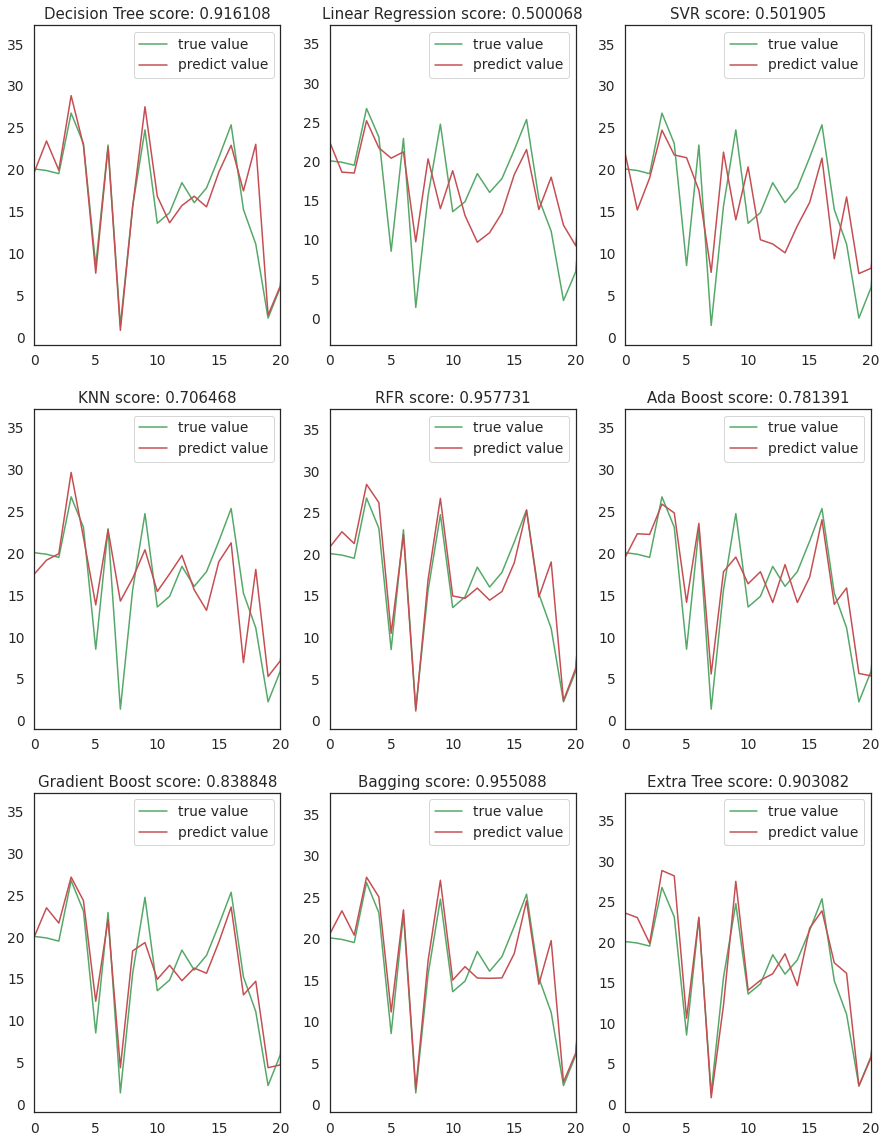

In [722]:
plt.figure(figsize=(15, 20))

for i in range(0,9):
    ax = plt.subplot(3,3,i+1)
    plt.xlim(0,20)
    try_different_method(names[i],regressors[i])

**可见DecisionTree、随机森林、Bagging、ExtraTree回归算法拟合较好，后续将用这些模型进行集成**

<h4> 4.3.2 回归评价和调参

**回归指标评价https://www.cnblogs.com/nxf-rabbit75/p/10415812.html**

In [714]:
def rmsle(y_true, y_pred, convertExp=True):
    # Apply exponential transformation function
    if convertExp:
        y_true = inv_boxcox1p(y_true,0.4)
        y_pred = inv_boxcox1p(y_pred,0.4)
        
    # Convert missing value to zero after log transformation
    log_true = np.nan_to_num(np.array([np.log(y+1) for y in y_true]))
    log_pred = np.nan_to_num(np.array([np.log(y+1) for y in y_pred]))
    
    # Compute RMSLE
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

model = RandomForestRegressor(n_estimators=20)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

rmsle(y_test,y_predict,True)


0.33093185117849533

In [713]:
model = BaggingRegressor()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

rmsle(y_test,y_predict,True)

0.3391989075344405

<font color="red" size=5>**交叉验证看一下，防止过拟合**

In [715]:
def cross_val(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 10))
    return(rmse) # 结果越小越好

In [717]:
cross_val(RandomForestRegressor(n_estimators=100))

array([1.7326503 , 1.70136491, 1.65806296, 1.69905952, 1.84493395,
       1.73270263, 1.66002169, 1.69914086, 1.76017977, 1.50466577])

In [718]:
cross_val(DecisionTreeRegressor())

array([2.59966624, 2.37535058, 2.30468385, 2.45301787, 2.57737937,
       2.91838428, 2.2844985 , 2.32142553, 2.33122094, 2.11167906])

In [719]:
cross_val(BaggingRegressor())

array([1.78409955, 1.826935  , 1.70360913, 1.85988681, 2.02147965,
       1.86961534, 1.76669702, 1.74594303, 1.78498361, 1.6234311 ])

**可以看初bagging模型的rmse整体标准差大于随机森林**

In [720]:
cross_val(LinearRegression())

array([5.55639865e+00, 5.92618873e+00, 5.86961345e+00, 5.82174443e+00,
       5.70942391e+00, 3.15655769e+09, 6.01932579e+00, 5.87118773e+00,
       5.78958784e+00, 5.67207883e+00])

**看一下随机森林算法预测和实际值的可视化差异**

<AxesSubplot:xlabel='count', ylabel='Density'>

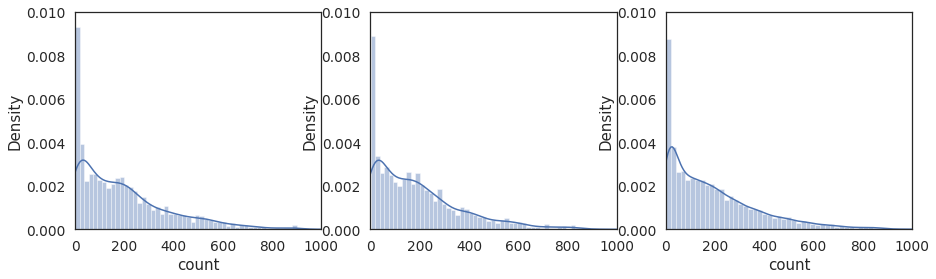

In [687]:
plt.figure(figsize=(15, 4))

plt.subplot(1,3,1)
plt.ylim(0,0.01)
plt.xlim(0,1000)
sns.distplot(inv_boxcox1p(y_test,0.4),bins=50)

plt.subplot(1,3,2)
plt.ylim(0,0.01)
plt.xlim(0,1000)
sns.distplot(inv_boxcox1p(y_predict,0.4),bins=50)

plt.subplot(1,3,3)
plt.ylim(0,0.01)
plt.xlim(0,1000)
sns.distplot(datane1['count'],bins=50)

<h4>4.3.3 网格交叉验证调参

**进行交叉验证，参考https://www.cnblogs.com/jiaxin359/p/8552800.html**

**cross_val_score交叉验证及其用于参数选择、模型选择、特征选择https://blog.csdn.net/weixin_38536057/article/details/78702564**

**rmsle公式来源https://www.kaggle.com/werooring/bike-sharing-demand-top-6-6-solution**

In [541]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False) # 此处利用上述的rmsle评估作为网格交叉验证中的scoreing预备

# Create GridSearchCV Object (with Ridge)
#gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,param_grid=ridge_params,scoring=rmsle_scorer,cv=5)

class grid():
    def __init__(self,model):
        self.model = model

    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring=rmsle_scorer)
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        pd.set_option('display.max_columns', None) # 显示所有列
        pd.set_option('max_colwidth',100) # 设置value的显示长度为100，默认为50
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

In [542]:
grid(RandomForestRegressor()).grid_get(X_train, y_train,{'n_estimators':[0,50,100,150]}) #随机森林

{'n_estimators': 150} 0.6017554628429169
                  params  mean_test_score  std_test_score
0    {'n_estimators': 0}              NaN             NaN
1   {'n_estimators': 50}         0.603673        0.011838
2  {'n_estimators': 100}         0.603800        0.011202
3  {'n_estimators': 150}         0.601755        0.011229


In [295]:
grid(DecisionTreeRegressor()).grid_get(X_train, y_train,{'max_depth':[0,5,10,15,20,25,30]}) #决策树

{'max_depth': 20} 0.5173468365950773
              params  mean_test_score  std_test_score
0   {'max_depth': 0}              NaN             NaN
1   {'max_depth': 5}         0.659421        0.016868
2  {'max_depth': 10}         0.549040        0.003871
3  {'max_depth': 15}         0.521507        0.004144
4  {'max_depth': 20}         0.517347        0.005182
5  {'max_depth': 25}         0.520853        0.004015
6  {'max_depth': 30}         0.525504        0.006655


In [544]:
grid(BaggingRegressor()).grid_get(X_train, y_train,{'n_estimators':[100,150,200]}) #bagging

{'n_estimators': 200} 0.601617088416562
                  params  mean_test_score  std_test_score
0  {'n_estimators': 100}         0.602432        0.010725
1  {'n_estimators': 150}         0.602744        0.009899
2  {'n_estimators': 200}         0.601617        0.010687


In [298]:
grid(ExtraTreeRegressor()).grid_get(X_train, y_train,{'max_depth':[0,5,10,15,20,25,30]}) #Extra tree

{'max_depth': 20} 0.5090718090209034
              params  mean_test_score  std_test_score
0   {'max_depth': 0}              NaN             NaN
1   {'max_depth': 5}         0.636132        0.013041
2  {'max_depth': 10}         0.542492        0.006176
3  {'max_depth': 15}         0.521028        0.005746
4  {'max_depth': 20}         0.509072        0.005269
5  {'max_depth': 25}         0.514751        0.004982
6  {'max_depth': 30}         0.525873        0.006341


<h4>4.3.4 模型集成

**根据上述调参后的模型进行定义**

In [302]:
rf = RandomForestRegressor(n_estimators=250)
dt = DecisionTreeRegressor(max_depth=20)
br = BaggingRegressor(n_estimators=150)
et = ExtraTreeRegressor(max_depth=20)

In [314]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone #自定义类的API

#平均
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        # 克隆原始模型
        self.models_ = [clone(x) for x in self.models]
        # 拟合克隆的模型
        for model in self.models_:
            model.fit(X, y)
        return self

    # 使用克隆的模型预测并取其平均值
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) \
        for model in self.models_])
        return np.mean(predictions, axis=1)

    
# Stacking模型
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds

    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))

        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred

        self.meta_model_.fit(out_of_fold_predictions, y)
        return self

    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

**之前房价预测的函数没用起**

**试一下mlxtend的集成方法**

In [710]:
rf = RandomForestRegressor(n_estimators=150)
dt = DecisionTreeRegressor(max_depth=20)
br = BaggingRegressor(n_estimators=200)
et = ExtraTreeRegressor(max_depth=20)

base model
loss is 0.1924633196745182
loss is 0.3327306090525539
loss is 0.18960735281103472
loss is 0.3014150580923257
stacking model
loss is 0.22405957967944648


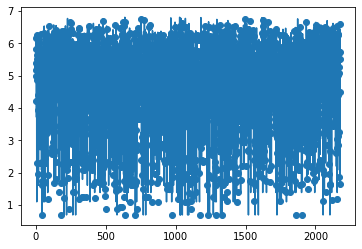

In [455]:
from mlxtend.regressor import StackingRegressor
from sklearn.metrics import mean_squared_error
models = [rf,dt,br,et]

print('base model')
for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print("loss is {}".format(mean_squared_error(y_test, pred)))
sclf = StackingRegressor(regressors=models, meta_regressor=rf)
# 训练回归器
sclf.fit(X_train, y_train)
pred = sclf.predict(X_test)

print('stacking model')
print("loss is {}".format(mean_squared_error(y_test, pred)))
plt.scatter(np.arange(len(pred)), pred)
plt.plot(np.arange(len(y_test)), y_test)
plt.show()


base model
loss is 2.688677496570169
loss is 2.6520416899594093
stacking model
loss is 2.6894623764143293


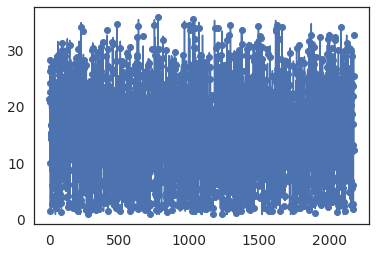

In [711]:
from mlxtend.regressor import StackingRegressor
from sklearn.metrics import mean_squared_error
models = [rf,br]

print('base model')
for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print("loss is {}".format(mean_squared_error(y_test, pred)))
sclf = StackingRegressor(regressors=models, meta_regressor=br)
# 训练回归器
sclf.fit(X_train, y_train)
pred = sclf.predict(X_test)

print('stacking model')
print("loss is {}".format(mean_squared_error(y_test, pred)))
plt.scatter(np.arange(len(pred)), pred)
plt.plot(np.arange(len(y_test)), y_test)
plt.show()


**集成后反而准确度降低了。。。**

<h3>4.4 预测

In [699]:
os.chdir('/home/songyang/project/kesci/bike/')
test = pd.read_csv("test.csv")

In [700]:
test['datetime']=pd.to_datetime(test['datetime'])
test['hour']=test['datetime'].dt.hour
test['year']=test['datetime'].dt.year
test['month']=test['datetime'].dt.month
test['weekday']=test['datetime'].dt.dayofweek

col = ['season','holiday','workingday','year','month','weekday','weather']
for i in col:
    test[i]=test[i].astype(str)

In [701]:
test = pd.get_dummies(test)
test = test.drop(columns=['atemp'])

In [702]:
test

,datetime,temp,humidity,windspeed,hour,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4,year_2011,year_2012,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2011-01-20 00:00:00,10.66,56,26.0027,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,10.66,56,0.0000,1,1,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,10.66,56,0.0000,2,1,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,10.66,56,11.0014,3,1,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,10.66,56,11.0014,4,1,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,10.66,60,11.0014,19,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6489,2012-12-31 20:00:00,10.66,60,11.0014,20,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6490,2012-12-31 21:00:00,10.66,60,11.0014,21,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6491,2012-12-31 22:00:00,10.66,56,8.9981,22,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [698]:
df

,count,temp,humidity,windspeed,hour,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4,year_2011,year_2012,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,5.264609,9.84,81,0.0000,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,8.542148,9.02,80,0.0000,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,7.623847,9.02,80,0.0000,2,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4.684412,9.84,75,0.0000,3,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.798770,9.84,75,0.0000,4,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,23.144366,15.58,50,26.0027,19,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10882,19.962917,14.76,57,15.0013,20,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10883,16.957843,13.94,61,15.0013,21,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10884,15.019324,13.94,61,6.0032,22,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


**就只用最好的随机森林来做最后的模型**

In [619]:
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

rmsle(y_test,y_predict,True)

0.359070764742662

In [703]:
fi_pred = model.predict(test.iloc[:,1:])

In [704]:
fi_red_re = inv_boxcox1p(fi_pred,0.4)

In [705]:
fi_red_re

array([ 10.88334343,   4.24658837,   3.3148367 , ..., 104.35103314,
        92.67951819,  53.17813729])

In [706]:
fi_re = pd.concat([test['datetime'],pd.DataFrame(fi_red_re)],axis=1)

In [707]:
fi_re.columns=['datetime','count']

In [708]:
fi_re.to_csv('/home/songyang/project/kesci/bike/sub.csv',index=0)

**最后RMSLE为0.41216**

In [709]:
363/3242

0.11196792103639729